In [7]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from skimage import io, color, filters
from skimage.transform import resize, rotate
from scipy.misc import imread
import matplotlib.pyplot as plt

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
train_generator = train_datagen.flow_from_directory(
        '../data/gray/all/',
        target_size=(30, 30),
        batch_size=1,
        class_mode='binary',
        shuffle=True)

Found 7094 images belonging to 2 classes.


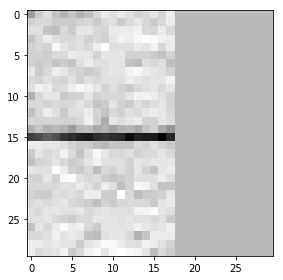

In [5]:
x,y = train_generator.next()
io.imshow(x[0])


In [9]:
x[0]

array([[[0.6156863 , 0.6156863 , 0.6156863 ],
        [0.7960785 , 0.7960785 , 0.7960785 ],
        [0.8745099 , 0.8745099 , 0.8745099 ],
        ...,
        [0.7254902 , 0.7254902 , 0.7254902 ],
        [0.7254902 , 0.7254902 , 0.7254902 ],
        [0.7254902 , 0.7254902 , 0.7254902 ]],

       [[0.8235295 , 0.8235295 , 0.8235295 ],
        [0.8470589 , 0.8470589 , 0.8470589 ],
        [0.8470589 , 0.8470589 , 0.8470589 ],
        ...,
        [0.7254902 , 0.7254902 , 0.7254902 ],
        [0.7254902 , 0.7254902 , 0.7254902 ],
        [0.7254902 , 0.7254902 , 0.7254902 ]],

       [[0.8745099 , 0.8745099 , 0.8745099 ],
        [0.8745099 , 0.8745099 , 0.8745099 ],
        [0.76470596, 0.76470596, 0.76470596],
        ...,
        [0.7254902 , 0.7254902 , 0.7254902 ],
        [0.7254902 , 0.7254902 , 0.7254902 ],
        [0.7254902 , 0.7254902 , 0.7254902 ]],

       ...,

       [[0.8470589 , 0.8470589 , 0.8470589 ],
        [0.8470589 , 0.8470589 , 0.8470589 ],
        [0.8745099 , 0